# 선형회귀
- 전장에 문제점 (1) 모델 선택이 잘못됨 (2) 특성이 길이 하나만으로 무게를 측정한다는게 말이 안됨.
- 모델선택이 잘못된것을 해결할 것.

```txt
선형회귀에서 선과 점에 오차율은 음수가 되수도 있기 때문에 모든손실(잔차)값에는 제곱을 해준뒤 더해서 MSE(평균 제곱 오차)를 구한다.
이 값이 최소가 되는 회귀식을 찾는 것을 최소제곱법이라고 하고 이때 사용하는 방법을 경사하강법(미분)이라한다
```

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split

# 훈련세트와 테스트 세트로 나눔 (크로스 밸리데이션)
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원배열로 바꿈
train_input = train_input.reshape(train_input.size,1)
test_input = test_input.reshape(test_input.size,1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input,train_target)

print(knr.predict([[50]]))

[1033.33333333]


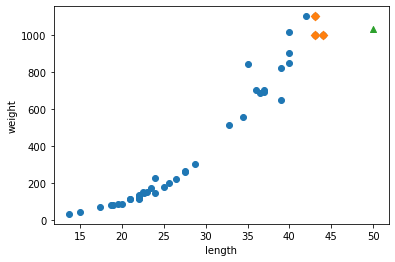

In [7]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트를 그림
plt.scatter(train_input,train_target)
# 훈련 세트 중 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
# 이웃 샘플들의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


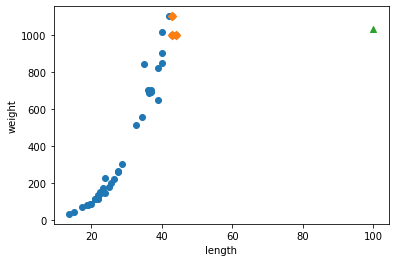

In [9]:
# 100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트를 그림
plt.scatter(train_input,train_target)
# 훈련 세트 중 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [11]:
# 농어 무게 = a(기울기) * 농어길이 + b(절편)
# y = 39.017 * x + (-709.018)

print(lr.coef_, lr.intercept_) # coef = 기울기, intercept = 절편

[39.01714496] -709.0186449535477


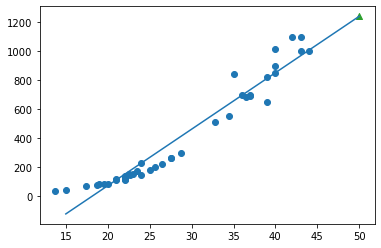

In [12]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15 ~ 50까지의 1차 방정식 그래프
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) # 선을 그리는 메서드
plt.scatter(50,1241,8,marker='^')

# 50cm 농어 데이터
plt.scatter(50,1241.8,marker='^')
plt.show()

In [13]:
# 훈련데이터보다 테스트데이터가 더 낮게 나옴
# 하지만 값이 비슷하지 않음. => 과대 적합
# => 특성이 너무 적어서 그럼.
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558
